In [ ]:
import matplotlib.pyplot as plt
# opencv
import cv2
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

In [11]:
cat = cv2.imread(r'CATS_DOGS\test\CAT\9374.jpg')
type(cat)

numpy.ndarray

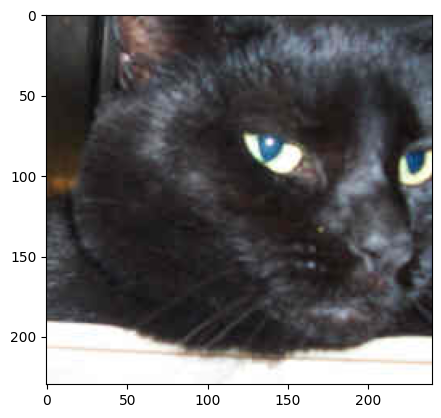

In [12]:
cat_img =cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat_img)

In [13]:
image_gen= ImageDataGenerator(rescale=1/255, 
                              rotation_range=30, 
                              width_shift_range=0.1, 
                              shear_range=0.9, 
                            zoom_range=0.2, 
                              horizontal_flip=True, 
                              height_shift_range=0.1)

In [14]:
image_gen.flow_from_directory(r'CATS_DOGS\train')

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory(r'CATS_DOGS\test')

Found 6251 images belonging to 2 classes.


### How does model know we have two classes?

Through our folders
- Train/Cat
- Train/Dog

- Test/Cat
- Test/Dog


### Why is flow from directory so cool?

- Because it takes data from ram and train on it and then puts it back
- The RAM address is 0x20409b04d90
- In MNIST sets, all data was in RAM


### Why are we not reshaping? When should we?

- Because we are making a model from scratch
- If we were using pre-built model, then we would use reshape

In [16]:
image_shape = (150,150,3)

### Building Models

In [19]:
model = Sequential()

# first conv layer
model.add(Conv2D(filters=20, kernel_size=(4,4), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(4,4)))


# second conv layer

model.add(Conv2D(filters=40, kernel_size=(4,4), activation='sigmoid'))
model.add(MaxPool2D(pool_size=(4,4)))


# third conv layer

model.add(Conv2D(filters=60, kernel_size=(6,6), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

# dense layers ANN
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))


#output
model.add(Dense(1, activation='sigmoid'))

### How does one neuron decide?
- If the neuron is always predicting class 1, then if its prob is 0.8 -> Class 1
- prob = 0.2, Class 2

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 147, 147, 20)   │           980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 33, 33, 40)     │        12,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 60)       │        86,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,409 (454.72 KB)

 Trainable params: 116,409 (454.72 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

### Training Model


In [39]:
batch_size = 16

train_img_gen = image_gen.flow_from_directory(r'CATS_DOGS\train',
                                              target_size = (150,150)
                                              , batch_size=16,
                                              class_mode = 'binary')

# this batch size is helping picking up 16 images, training them, and removing from RAM and then repicking 16 images

Found 18743 images belonging to 2 classes.


In [40]:

test_img_gen = image_gen.flow_from_directory(r'CATS_DOGS\test',
                                              target_size = (150,150)
                                              , batch_size=16,
                                              class_mode = 'binary')


Found 6251 images belonging to 2 classes.


In [41]:
train_img_gen.image_shape

(150, 150, 3)

In [42]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [43]:
test_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [45]:
result = model.fit(train_img_gen
                   ,epochs = 5
                   ,steps_per_epoch = 150
                    ,validation_data = test_img_gen
                 ,validation_steps =12
                 )

Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.5541 - loss: 0.6884 - val_accuracy: 0.5729 - val_loss: 0.6903
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - accuracy: 0.5492 - loss: 0.6811 - val_accuracy: 0.5365 - val_loss: 0.6804
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 226ms/step - accuracy: 0.5570 - loss: 0.6840 - val_accuracy: 0.5938 - val_loss: 0.6847
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.5552 - loss: 0.6896 - val_accuracy: 0.5677 - val_loss: 0.6739
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 187ms/step - accuracy: 0.5541 - loss: 0.6899 - val_accuracy: 0.5208 - val_loss: 0.6728


### Training explanation

- total images = 18743
- 18743/batch_size = 18743/16 = 1172 batches for each epoch
- instead of running over 1172 batches in each epoch 
- it runs on 150 random batches from in each epoch 
- so, 150*16 images are used for training
- previously 1172 * 16 images were used for training

- PLEASE NOTE 150 = batches, 16 = batch size / no of images in each batch


### Testing Explanation

- Total images = 6251
- 6251/16 =391 batches for each epoch
- its uses 12 random batches in each epoch
- this makes 12*16 images

### Is this overfit?

- Nop, training and test accuracy are pretty much near so no issue.

In [50]:
6251/16

390.6875

In [46]:
16*12

192